In [27]:
import mysql.connector
import pandas as pd
import numpy as np

def load_stockdata(symbol):
    serverName = "localhost"
    cnx = mysql.connector.connect(user='michael', password='Password2017',
                                  host=serverName, database='stock_market')
    cursor = cnx.cursor()
    
    query = "select * from (SELECT effective_date, `adj_open`, `adj_high`, `adj_low`, `adj_close`, `adj_volume` FROM `market.stock_price` WHERE symbol = '{0}' order\
            by effective_date DESC limit 100) sub order by effective_date ASC".format(symbol)
    
    cursor.execute(query)
    dfsql = pd.DataFrame(cursor.fetchall(), dtype=np.float)
    dfsql.columns = cursor.column_names
    dfsql.set_index('effective_date', inplace=True)
    return dfsql

In [28]:
df = load_stockdata('MSFT')
df.head()

,adj_open,adj_high,adj_low,adj_close,adj_volume
effective_date,,,,,
2017-09-22,73.617388,74.134770,73.478094,74.035273,13969937.0
2017-09-25,73.716885,73.876079,72.552777,72.891065,23502422.0
2017-09-26,73.299000,73.438295,72.622424,72.891065,17105469.0
2017-09-27,73.179604,73.796482,72.801518,73.478094,18934048.0
2017-09-28,73.169655,73.597489,72.940813,73.497993,10814063.0


## make candle dataset

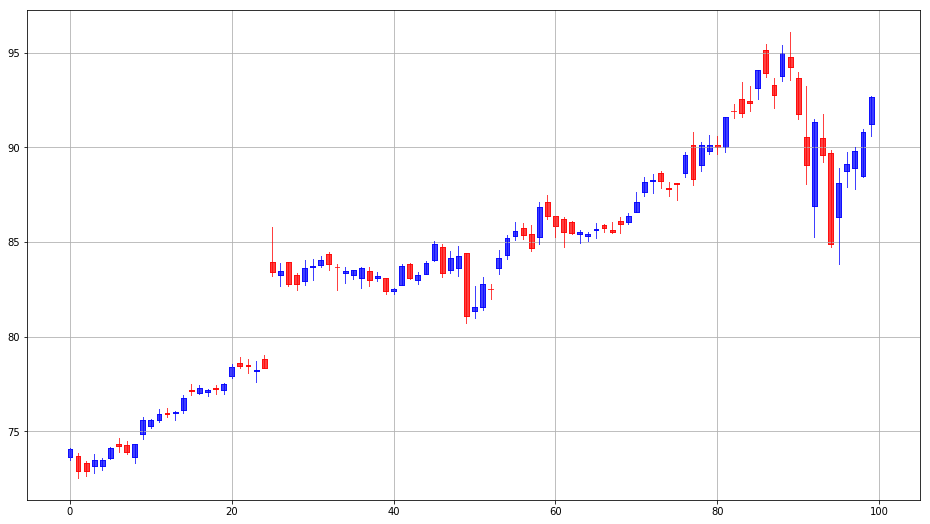

In [42]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
# from matplotlib.finance import candlestick_ohlc
from mpl_finance import candlestick2_ohlc

fig, ax = plt.subplots(figsize=(16, 10))
fig.subplots_adjust(bottom=0.2)


candlestick2_ohlc(ax,df['adj_open'],df['adj_high'],df['adj_low'],df['adj_close'], width=0.6, colorup='b', colordown='r')

plt.grid(True)
# ax.xaxis_date()
# dates on the x-axis
ax.autoscale_view()

# plt.setp(plt.gca().get_xticklabels(), rotation=30)

In [16]:
# !python -m pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

  Running setup.py install for mpl-finance: started
    Running setup.py install for mpl-finance: finished with status 'done'
